In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Shape: (30000, 24)
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  \
0    20000.0    2          2         1  24.0      2      2     -1     -1     -2     -2     3913.0     3102.0   
1   120000.0    2          2         2  26.0     -1      2      0      0      0      2     2682.0     1725.0   
2    90000.0    2          2         2  34.0      0      0      0      0      0      0    29239.0    14027.0   
3    50000.0    2          2         1  37.0      0      0      0      0      0      0    46990.0    48233.0   
4    50000.0    1          2         1  57.0     -1      0     -1      0      0      0     8617.0     5670.0   

   BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0      689.0        0.0        0.0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     2682.0     3272.0     3455.0     3261.0       0.0    1000.0    1000.0    1000.0     

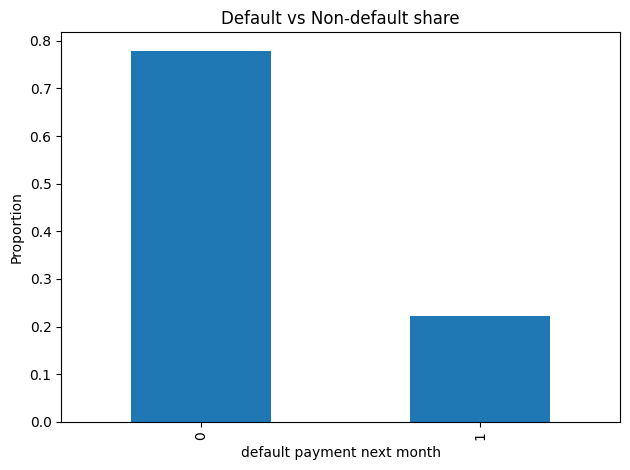

In [2]:
# ----------------------------------------------------------------------
# 0. CONFIG & LOAD CLEANED DATA
# ----------------------------------------------------------------------

DATA_PATH = "data/default_cc_clean_stage1.csv"
TARGET_COL = "default payment next month"  # change if you renamed it

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
print(df.head())
print(df.dtypes)

assert TARGET_COL in df.columns, "Target column not found! Check TARGET_COL name."

# Quick target distribution
target_counts = df[TARGET_COL].value_counts()
target_rates = df[TARGET_COL].value_counts(normalize=True)

print("\nTarget counts:")
print(target_counts)
print("\nTarget rates:")
print(target_rates)

plt.figure()
target_rates.plot(kind="bar")
plt.title("Default vs Non-default share")
plt.xlabel(TARGET_COL)
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


Numeric columns: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Numeric summary:
             count           mean            std       min        1%       5%       50%        95%        99%  \
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  10000.00  20000.0  140000.0  430000.00  500000.00   
AGE        30000.0      35.485500       9.217904      21.0     22.00     23.0      34.0      53.00      60.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0    -81.00      0.0   22381.5  201203.05  350110.68   
BILL_AMT2  30000.0   49179.075167   71173.768783  -69777.0   -200.00      0.0   21200.0  194792.20  337495.28   
BILL_AMT3  30000.0   47013.154800   69349.387427 -157264.0   -200.00      0.0   20088.5  187821.05  325030.39   
BILL_AMT4  30000.0   43262.948967   64332.856134 -170000.0   -212.02      0.0   19052.0  174333.35  304997.27   
BI

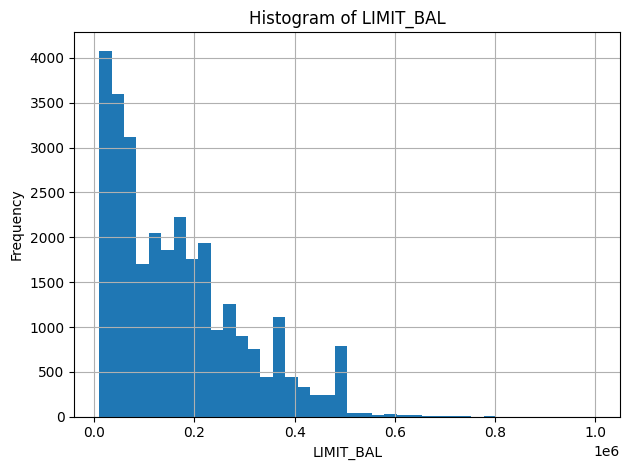

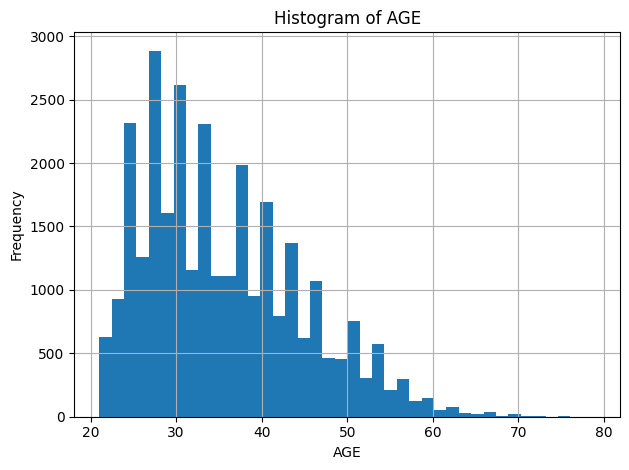

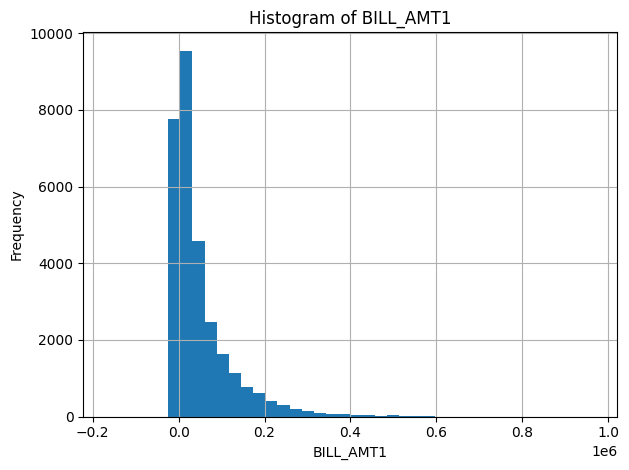

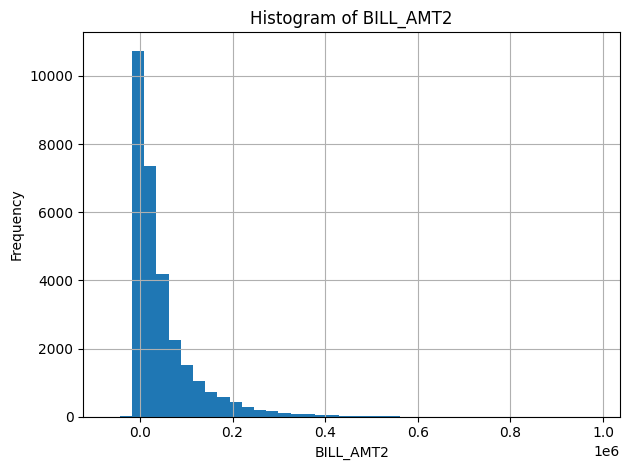

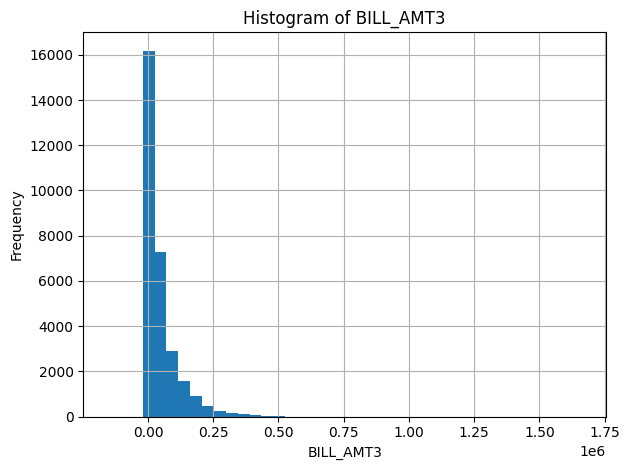

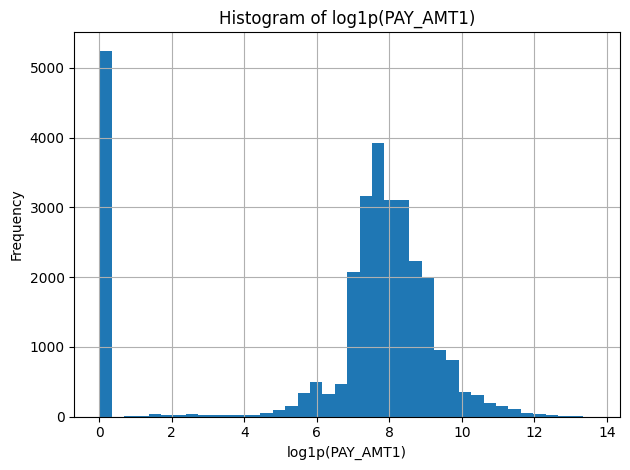

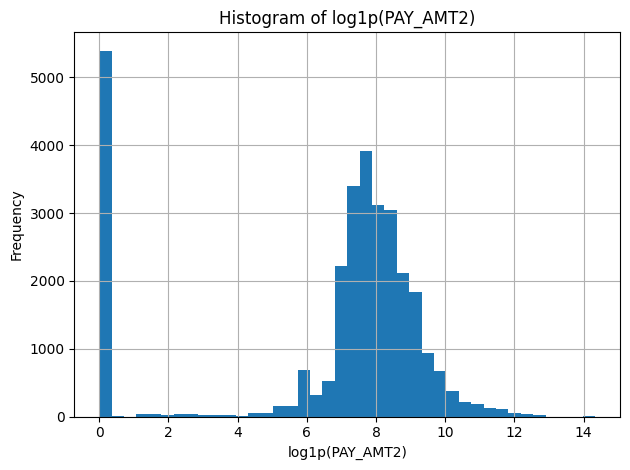

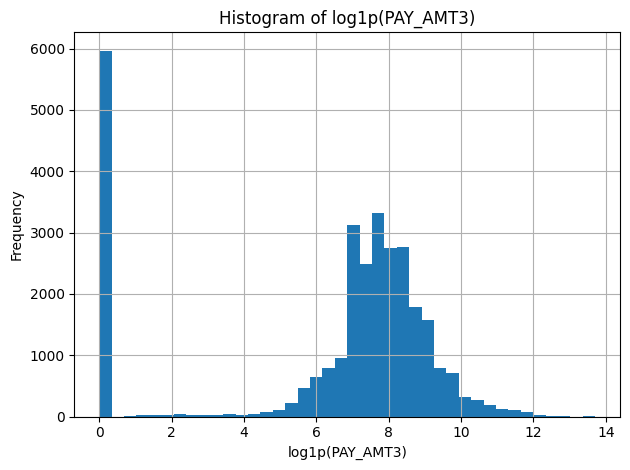

In [3]:
# ----------------------------------------------------------------------
# 1. UNIVARIATE ANALYSIS – NUMERIC FEATURES
# ----------------------------------------------------------------------

num_cols = [
    c for c in df.columns
    if c not in ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", TARGET_COL]
]

print("\nNumeric columns:", num_cols)

# Summary stats
num_summary = df[num_cols].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).T
print("\nNumeric summary:")
print(num_summary)

# Histograms for key numeric variables
key_num_cols = ["LIMIT_BAL", "AGE"]  #more can be added

for col in key_num_cols:
    plt.figure()
    df[col].hist(bins=40)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Histograms for highly skewed payment/bill amounts 
bill_cols = [c for c in df.columns if c.startswith("BILL_AMT")]
pay_cols = [c for c in df.columns if c.startswith("PAY_AMT")]

for col in bill_cols[:3]:  
    plt.figure()
    df[col].hist(bins=40)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

for col in pay_cols[:3]:
    plt.figure()
    # log1p to reduce skew to see beetter 
    np.log1p(df[col]).hist(bins=40)
    plt.title(f"Histogram of log1p({col})")
    plt.xlabel(f"log1p({col})")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


Categorical columns: ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

Value counts for SEX:
SEX
1    0.396267
2    0.603733
Name: proportion, dtype: float64


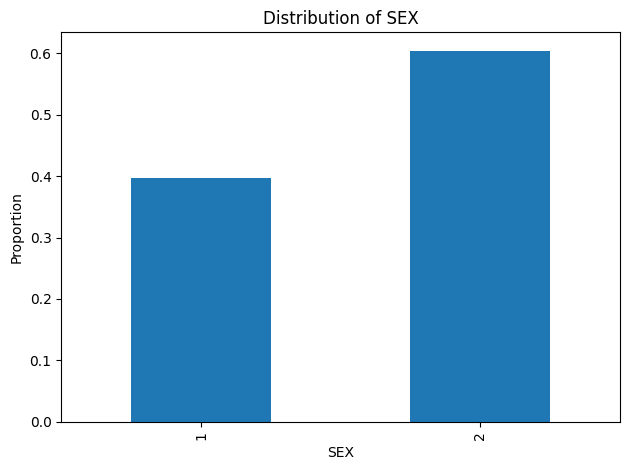


Value counts for EDUCATION:
EDUCATION
1    0.352833
2    0.467667
3    0.163900
4    0.015600
Name: proportion, dtype: float64


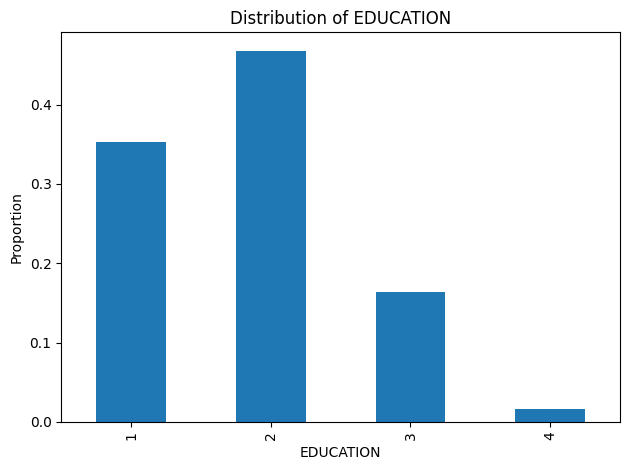


Value counts for MARRIAGE:
MARRIAGE
1    0.455300
2    0.532133
3    0.012567
Name: proportion, dtype: float64


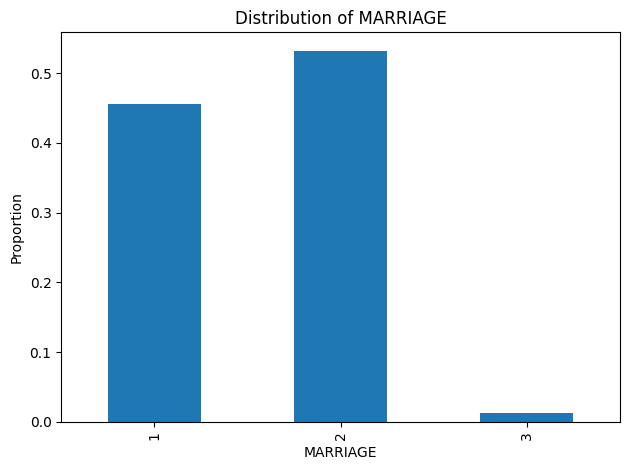


Value counts for PAY_0:
PAY_0
-2    0.091967
-1    0.189533
 0    0.491233
 1    0.122933
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 6    0.000367
 7    0.000300
 8    0.000633
Name: proportion, dtype: float64


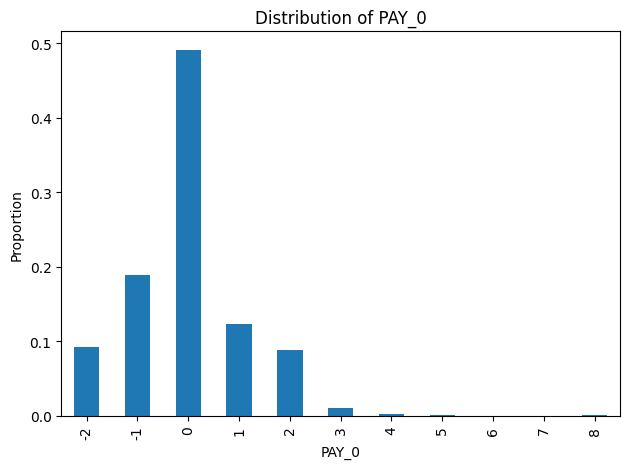


Value counts for PAY_2:
PAY_2
-2    0.126067
-1    0.201667
 0    0.524333
 1    0.000933
 2    0.130900
 3    0.010867
 4    0.003300
 5    0.000833
 6    0.000400
 7    0.000667
 8    0.000033
Name: proportion, dtype: float64


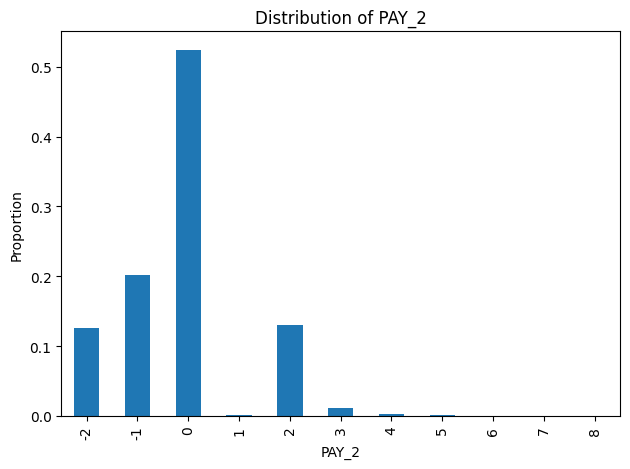


Value counts for PAY_3:
PAY_3
-2    0.136167
-1    0.197933
 0    0.525467
 1    0.000133
 2    0.127300
 3    0.008000
 4    0.002533
 5    0.000700
 6    0.000767
 7    0.000900
 8    0.000100
Name: proportion, dtype: float64


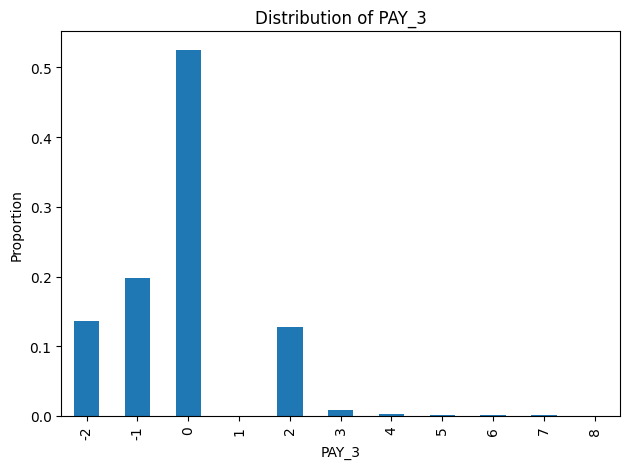


Value counts for PAY_4:
PAY_4
-2    0.144933
-1    0.189567
 0    0.548500
 1    0.000067
 2    0.105300
 3    0.006000
 4    0.002300
 5    0.001167
 6    0.000167
 7    0.001933
 8    0.000067
Name: proportion, dtype: float64


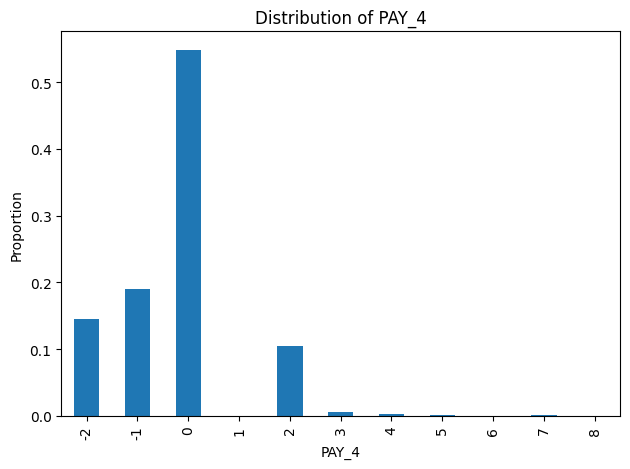


Value counts for PAY_5:
PAY_5
-2    0.151533
-1    0.184633
 0    0.564900
 2    0.087533
 3    0.005933
 4    0.002800
 5    0.000567
 6    0.000133
 7    0.001933
 8    0.000033
Name: proportion, dtype: float64


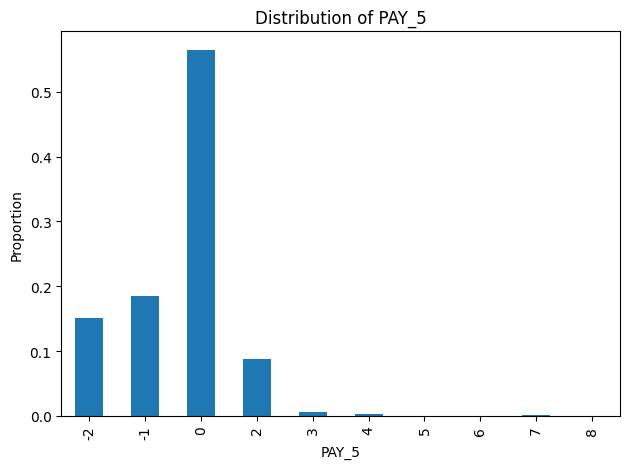


Value counts for PAY_6:
PAY_6
-2    0.163167
-1    0.191333
 0    0.542867
 2    0.092200
 3    0.006133
 4    0.001633
 5    0.000433
 6    0.000633
 7    0.001533
 8    0.000067
Name: proportion, dtype: float64


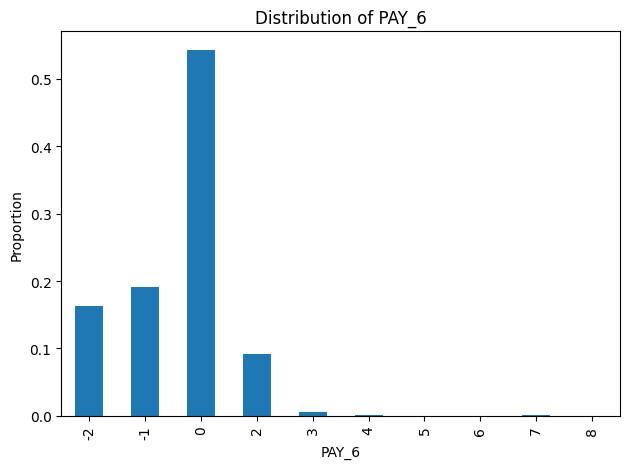

In [4]:
# ----------------------------------------------------------------------
# 2. UNIVARIATE ANALYSIS – CATEGORICAL FEATURES
# ----------------------------------------------------------------------

cat_cols = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

print("\nCategorical columns:", cat_cols)

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(normalize=True).sort_index())

    plt.figure()
    df[col].value_counts(normalize=True).sort_index().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.tight_layout()
    plt.show()


Default rate by SEX:
     default_rate  n_obs
SEX                     
1        0.241672  11888
2        0.207763  18112


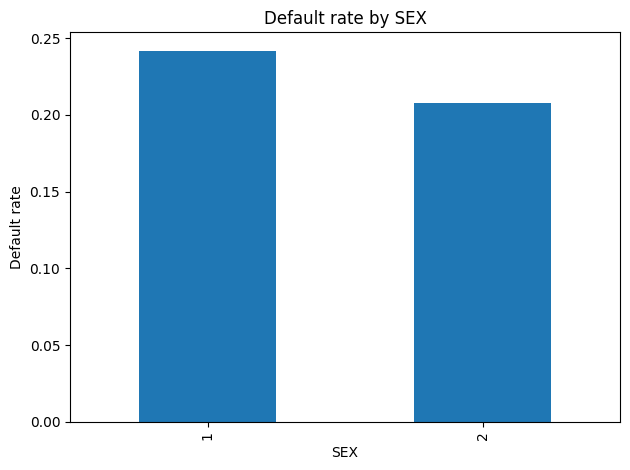


Default rate by EDUCATION:
           default_rate  n_obs
EDUCATION                     
1              0.192348  10585
2              0.237349  14030
3              0.251576   4917
4              0.070513    468


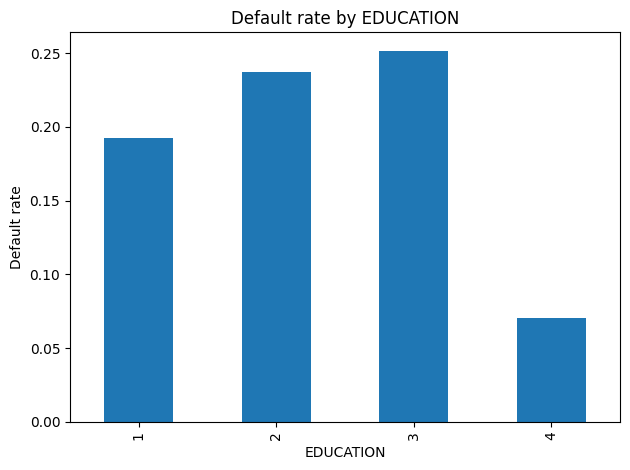


Default rate by MARRIAGE:
          default_rate  n_obs
MARRIAGE                     
1             0.234717  13659
2             0.209283  15964
3             0.236074    377


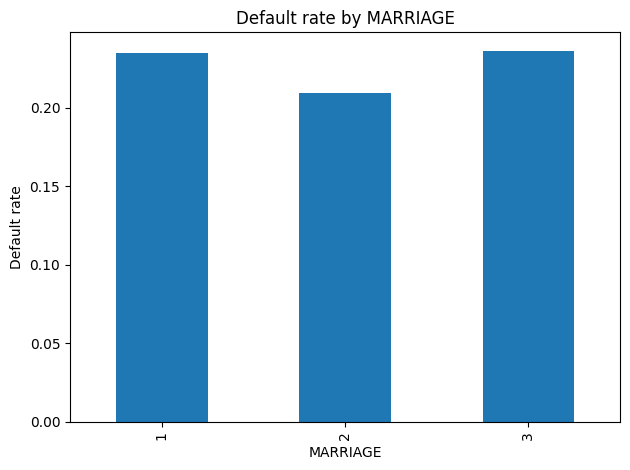


Default rate by PAY_0:
       default_rate  n_obs
PAY_0                     
-2         0.132294   2759
-1         0.167781   5686
 0         0.128113  14737
 1         0.339479   3688
 2         0.691414   2667
 3         0.757764    322
 4         0.684211     76
 5         0.500000     26
 6         0.545455     11
 7         0.777778      9
 8         0.578947     19


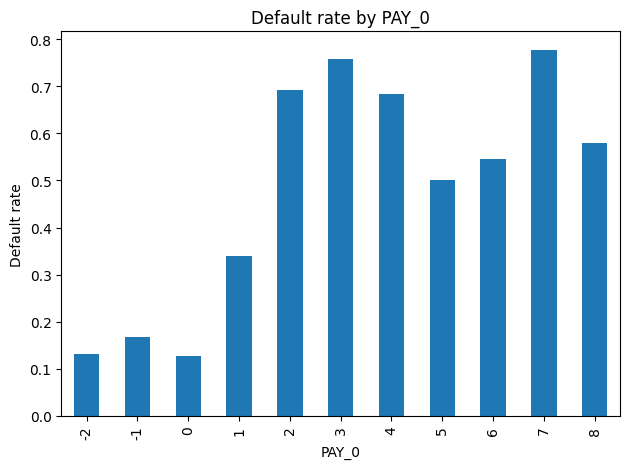


Default rate by PAY_2:
       default_rate  n_obs
PAY_2                     
-2         0.182708   3782
-1         0.159669   6050
 0         0.159123  15730
 1         0.178571     28
 2         0.556150   3927
 3         0.616564    326
 4         0.505051     99
 5         0.600000     25
 6         0.750000     12
 7         0.600000     20
 8         0.000000      1


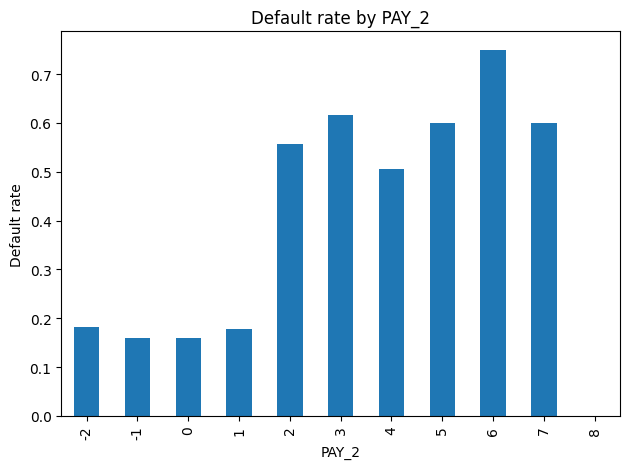


Default rate by PAY_3:
       default_rate  n_obs
PAY_3                     
-2         0.185312   4085
-1         0.155945   5938
 0         0.174512  15764
 1         0.250000      4
 2         0.515580   3819
 3         0.575000    240
 4         0.578947     76
 5         0.571429     21
 6         0.608696     23
 7         0.814815     27
 8         0.666667      3


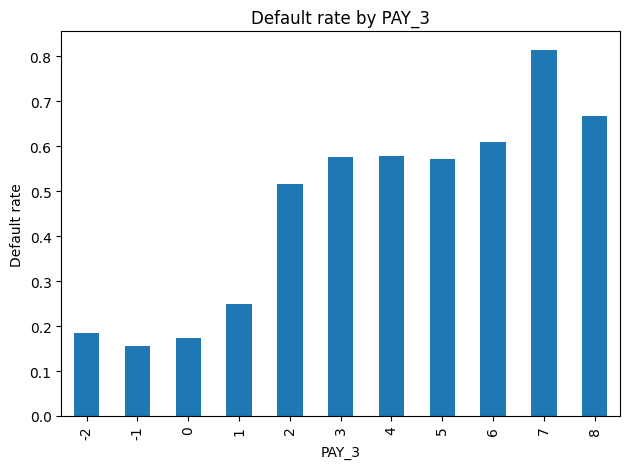


Default rate by PAY_4:
       default_rate  n_obs
PAY_4                     
-2         0.192502   4348
-1         0.158959   5687
 0         0.183288  16455
 1         0.500000      2
 2         0.523267   3159
 3         0.611111    180
 4         0.666667     69
 5         0.514286     35
 6         0.400000      5
 7         0.827586     58
 8         0.500000      2


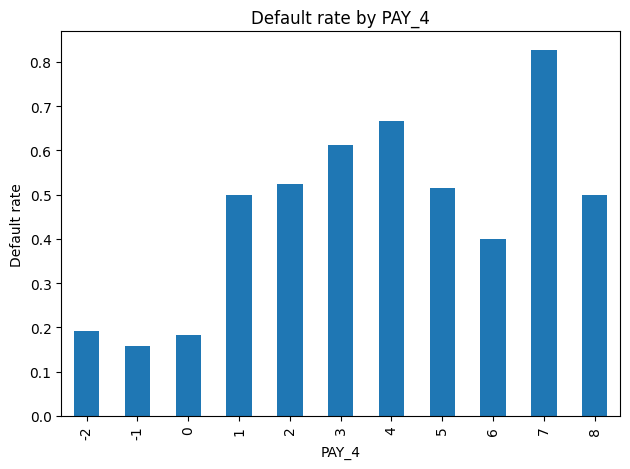


Default rate by PAY_5:
       default_rate  n_obs
PAY_5                     
-2         0.196876   4546
-1         0.161943   5539
 0         0.188529  16947
 2         0.541889   2626
 3         0.634831    178
 4         0.607143     84
 5         0.588235     17
 6         0.750000      4
 7         0.827586     58
 8         1.000000      1


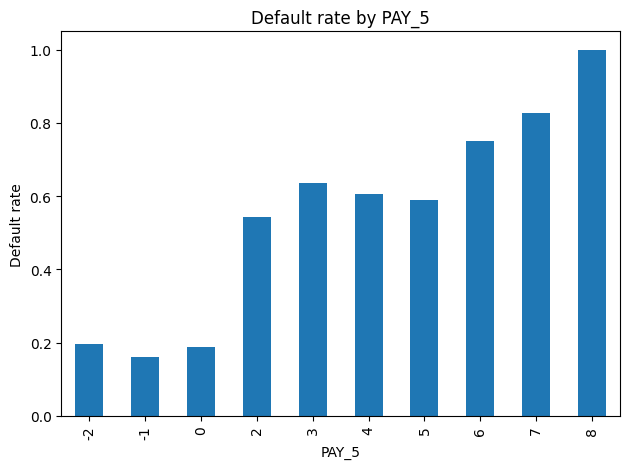


Default rate by PAY_6:
       default_rate  n_obs
PAY_6                     
-2         0.200409   4895
-1         0.169861   5740
 0         0.188444  16286
 2         0.506508   2766
 3         0.641304    184
 4         0.632653     49
 5         0.538462     13
 6         0.736842     19
 7         0.826087     46
 8         1.000000      2


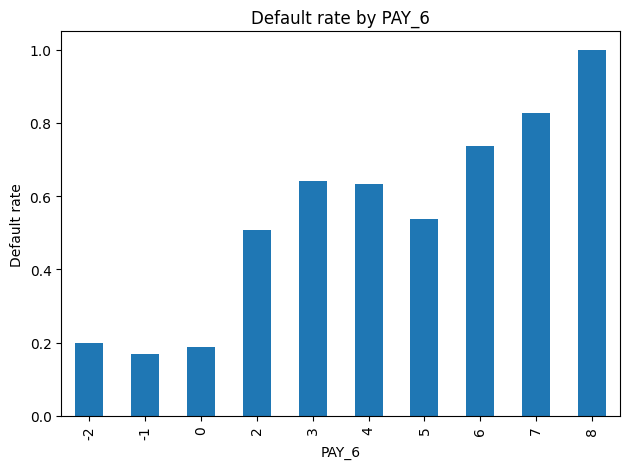

In [5]:

# ----------------------------------------------------------------------
# 3. DEFAULT RATE BY CATEGORICAL FEATURES (RISK VIEW)
# ----------------------------------------------------------------------

def default_rate_by_category(df: pd.DataFrame, col: str, target: str = TARGET_COL) -> pd.DataFrame:
    """
    Returns a DataFrame with default rate and count for each category of col.
    """
    out = (
        df.groupby(col)[target]
        .agg(["mean", "count"])
        .rename(columns={"mean": "default_rate", "count": "n_obs"})
        .sort_index()
    )
    return out

for col in cat_cols:
    dr = default_rate_by_category(df, col)
    print(f"\nDefault rate by {col}:")
    print(dr)

    plt.figure()
    dr["default_rate"].plot(kind="bar")
    plt.title(f"Default rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Default rate")
    plt.tight_layout()
    plt.show()

C:\Users\allan\AppData\Local\Temp\ipykernel_29616\101929893.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("LIMIT_BAL_BIN")[TARGET_COL]



Default rate by LIMIT_BAL quintiles:
                       default_rate  n_obs
LIMIT_BAL_BIN                             
(9999.999, 50000.0]        0.317874   7676
(50000.0, 100000.0]        0.257984   4822
(100000.0, 180000.0]       0.198595   6123
(180000.0, 270000.0]       0.168604   5421
(270000.0, 1000000.0]      0.137966   5958


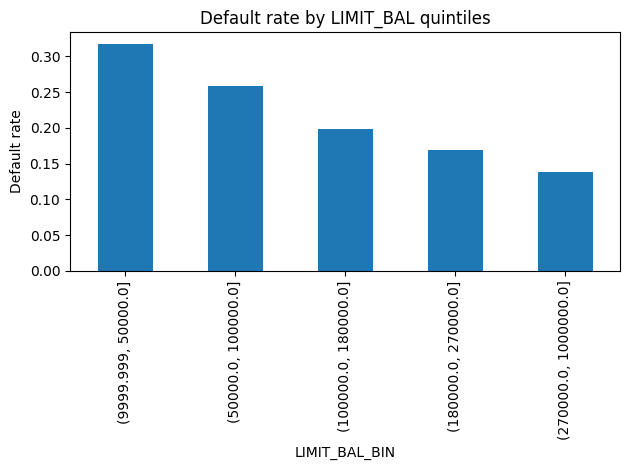


Default rate by AGE bins:
          default_rate  n_obs
AGE_BIN                      
[20, 30)      0.228426   9618
[30, 40)      0.202527  11238
[40, 50)      0.229734   6464
[50, 60)      0.248612   2341
[60, 70)      0.283439    314
[70, 80)      0.280000     25


C:\Users\allan\AppData\Local\Temp\ipykernel_29616\101929893.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AGE_BIN")[TARGET_COL]


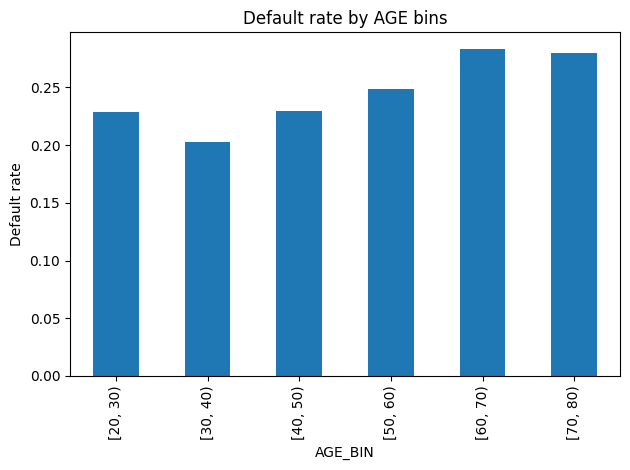

In [6]:
# ----------------------------------------------------------------------
# 4. DEFAULT RATE BY BUCKETED NUMERIC FEATURES
# ----------------------------------------------------------------------

# eg: LIMIT_BAL buckets (quintiles), can be done with  any of the non categorical parameters
df["LIMIT_BAL_BIN"] = pd.qcut(df["LIMIT_BAL"], q=5, duplicates="drop")

dr_limit = (
    df.groupby("LIMIT_BAL_BIN")[TARGET_COL]
    .agg(["mean", "count"])
    .rename(columns={"mean": "default_rate", "count": "n_obs"})
)

print("\nDefault rate by LIMIT_BAL quintiles:")
print(dr_limit)

plt.figure()
dr_limit["default_rate"].plot(kind="bar")
plt.title("Default rate by LIMIT_BAL quintiles")
plt.xlabel("LIMIT_BAL_BIN")
plt.ylabel("Default rate")
plt.tight_layout()
plt.show()

# AGE buckets (e.g., 20–29, 30–39, ...)
age_bins = [20, 30, 40, 50, 60, 70, 80]
df["AGE_BIN"] = pd.cut(df["AGE"], bins=age_bins, right=False)

dr_age = (
    df.groupby("AGE_BIN")[TARGET_COL]
    .agg(["mean", "count"])
    .rename(columns={"mean": "default_rate", "count": "n_obs"})
)

print("\nDefault rate by AGE bins:")
print(dr_age)

plt.figure()
dr_age["default_rate"].plot(kind="bar")
plt.title("Default rate by AGE bins")
plt.xlabel("AGE_BIN")
plt.ylabel("Default rate")
plt.tight_layout()
plt.show()


Correlation matrix (subset):
           LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
LIMIT_BAL   1.000000  0.144713   0.285430   0.278314   0.283236   0.293988   0.295562   0.290389  0.195236  0.178408   
AGE         0.144713  1.000000   0.056239   0.054283   0.053710   0.051353   0.049345   0.047613  0.026147  0.021785   
BILL_AMT1   0.285430  0.056239   1.000000   0.951484   0.892279   0.860272   0.829779   0.802650  0.140277  0.099355   
BILL_AMT2   0.278314  0.054283   0.951484   1.000000   0.928326   0.892482   0.859778   0.831594  0.280365  0.100851   
BILL_AMT3   0.283236  0.053710   0.892279   0.928326   1.000000   0.923969   0.883910   0.853320  0.244335  0.316936   
BILL_AMT4   0.293988  0.051353   0.860272   0.892482   0.923969   1.000000   0.940134   0.900941  0.233012  0.207564   
BILL_AMT5   0.295562  0.049345   0.829779   0.859778   0.883910   0.940134   1.000000   0.946197  0.217031  0.181246   
BILL_AMT6 

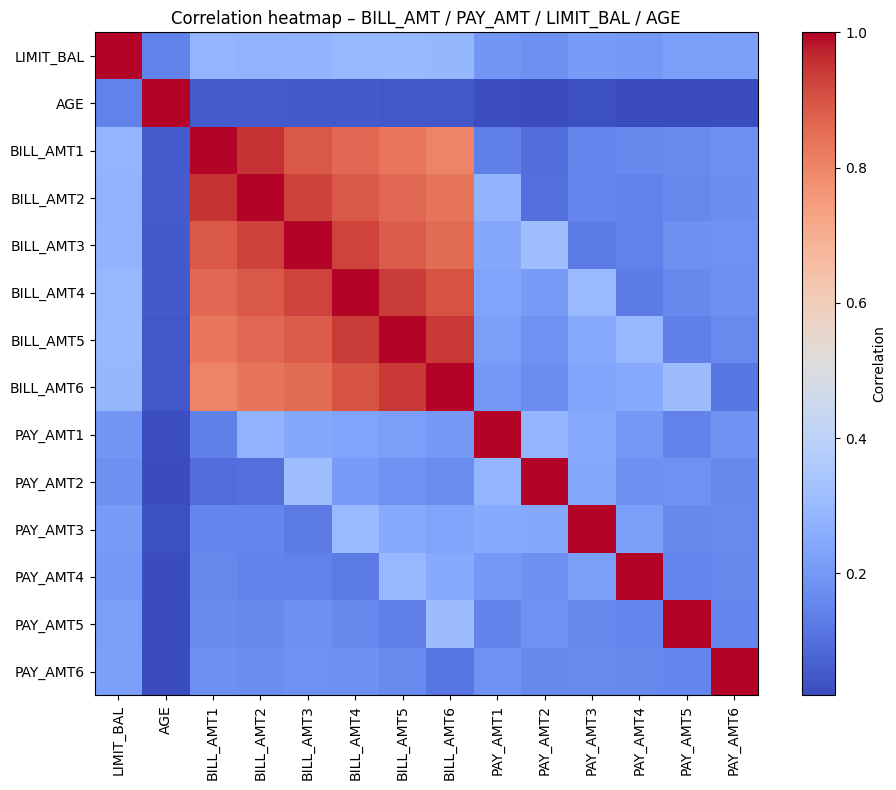

In [7]:
# ----------------------------------------------------------------------
# 5. CORRELATION ANALYSIS FOR NUMERIC FEATURES
# ----------------------------------------------------------------------

corr_cols = ["LIMIT_BAL", "AGE"] + bill_cols + pay_cols

corr_matrix = df[corr_cols].corr()

print("\nCorrelation matrix (subset):")
print(corr_matrix)

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr_cols)), corr_cols, rotation=90)
plt.yticks(range(len(corr_cols)), corr_cols)
plt.title("Correlation heatmap – BILL_AMT / PAY_AMT / LIMIT_BAL / AGE")
plt.tight_layout()
plt.show()